<h1>Predizendo jogos que serão "Hits" (> de 1 milhão de vendas) com Regressão Logistica e Random Forest (Ed. 2019)</h1>
<strong>Autor: Leonardo Gasparini Romão </strong>

Neste notebook, vou tentar fazer utilizar Machine Learning para descobrir os futuros jogos que serão os maiores sucesso,
vou utilizar a mesma técnica utilizada neste <a href="https://www.kaggle.com/ignacioch/predicting-vg-hits-1-million-sales-with-lr-rfc"> link </a> por <strong>Ignacio Chavarria</strong>

<h2>1. Preparação de dados (Data Wrangling) / Análise Exploratória</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1.1 Gather</h3>
Diferente do exemplo do Ignácio, eu peguei dados de outros lugares além do Dataset do Kaggle que ele usou,
e assim consegui criar um Dataset mais Robusto para avaliar meus Dados

In [2]:
#Ler o Csv e mostrar as primeiras 5 linhas
df = pd.read_csv("JogosMetacriticCompleto.csv", delimiter = ";")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24342 entries, 0 to 24341
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Link              16051 non-null  object 
 1   Nome              24342 non-null  object 
 2   NotaCritico       16967 non-null  float64
 3   NumCritics        16910 non-null  float64
 4   NotaPublico       17011 non-null  float64
 5   NumPublicCritics  16831 non-null  float64
 6   NA_Sales          15811 non-null  float64
 7   EU_Sales          15811 non-null  float64
 8   JP_Sales          15811 non-null  float64
 9   Other_Sales       15811 non-null  float64
 10  Global_Sales      15827 non-null  float64
 11  DataLancamento    24214 non-null  object 
 12  Plataforma        24342 non-null  object 
 13  ImagemUrl         16051 non-null  object 
 14  Summary           15988 non-null  object 
 15  Developer         18412 non-null  object 
 16  Publisher         16014 non-null  object

,Link,Nome,NotaCritico,NumCritics,NotaPublico,NumPublicCritics,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Plataforma,ImagemUrl,Summary,Developer,Publisher,Genre,GenreMetacritic,NoOfPlayers,Rate,AnoLancamento
0,/game/nintendo-64/the-legend-of-zelda-ocarina-...,The Legend of Zelda: Ocarina of Time,99.0,22.0,9.1,4673.0,2.09,1.31,0.62,0.31,...,Nintendo 64,https://static.metacritic.com/images/products/...,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,Nintendo,Action,"Action Adventure, Fantasy",1 Player,E,1998.0
1,/game/playstation/tony-hawks-pro-skater-2,Tony Hawk's Pro Skater 2,98.0,19.0,7.5,494.0,3.05,1.41,0.02,0.20,...,Playstation,https://static.metacritic.com/images/products/...,The BEST SKATEBOARDING GAME.YEEEEEEEEEEEEEEEEE...,Neversoft Entertainment,Activision,Sports,"Sports, Alternative, Skateboarding",NaN,T,2000.0
2,/game/playstation-3/grand-theft-auto-iv,Grand Theft Auto IV,98.0,64.0,7.5,3291.0,4.76,3.69,0.44,1.61,...,Playstation 3,https://static.metacritic.com/images/products/...,[Metacritic's 2008 PS3 Game of the Year; Also ...,Rockstar North,Take-Two Interactive,Action,"Action Adventure, Modern, Modern, Open-World",1 Player,M,2008.0
3,/game/dreamcast/soulcalibur,SoulCalibur,98.0,24.0,8.6,271.0,0.00,0.00,0.34,0.00,...,Dreamcast,https://static.metacritic.com/images/products/...,It&#039;s Soul Caliber. Tekken is poor compar...,Namco,Namco Bandai Games,Fighting,"Action, Fighting, 3D",NaN,T,1999.0
4,/game/xbox-360/grand-theft-auto-iv,Grand Theft Auto IV,98.0,86.0,7.9,3182.0,6.76,3.07,0.14,1.03,...,Xbox 360,https://static.metacritic.com/images/products/...,[Metacritic's 2008 Xbox 360 Game of the Year; ...,Rockstar North,Take-Two Interactive,Action,"Action Adventure, Modern, Modern, Open-World",1 Player,M,2008.0


<h3>1.2 Clean</h3>

In [3]:
#Completar as colunas com ás médias
cols = ['NotaCritico','NumCritics','NotaPublico','NumPublicCritics','NA_Sales'
  ,'EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for col in cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Completar as colunas com desconhecido
cols = ['Developer', 'Publisher']
for col in cols:
    df[col].fillna('Unknown', inplace=True)

#Completa o ano de lançamento colocando a média dos jogos da plataforma
df['AnoLancamento'] = df.groupby("Plataforma")['AnoLancamento'].transform(lambda x: x.fillna(x.mean()))

<h3>1.3 Analisys</h3>

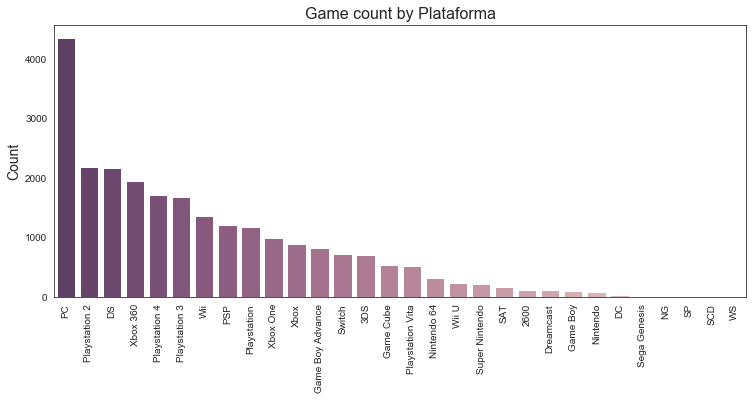

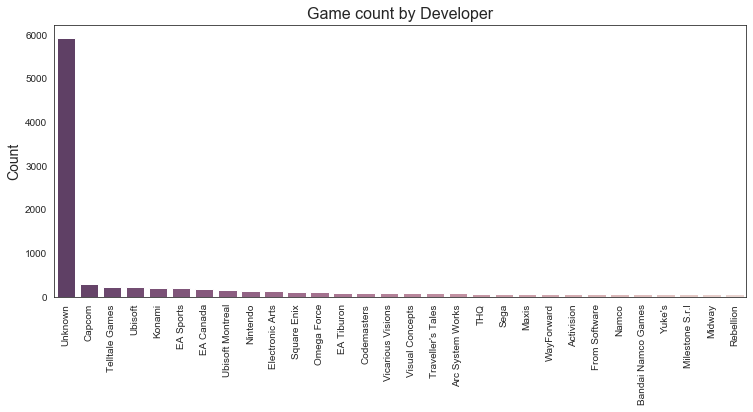

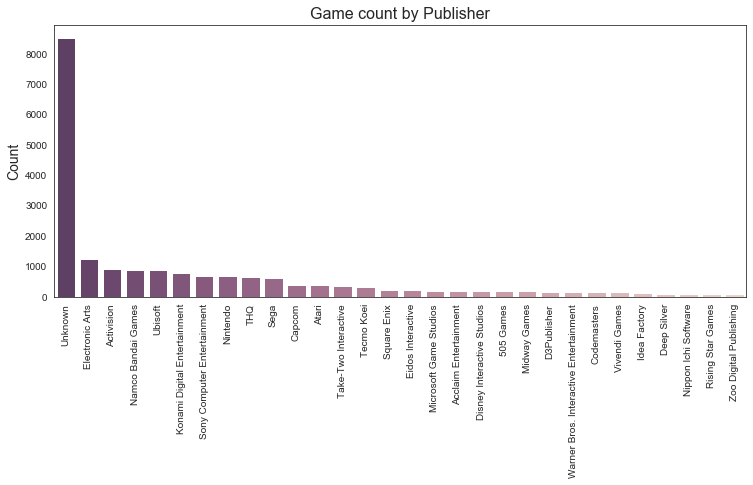

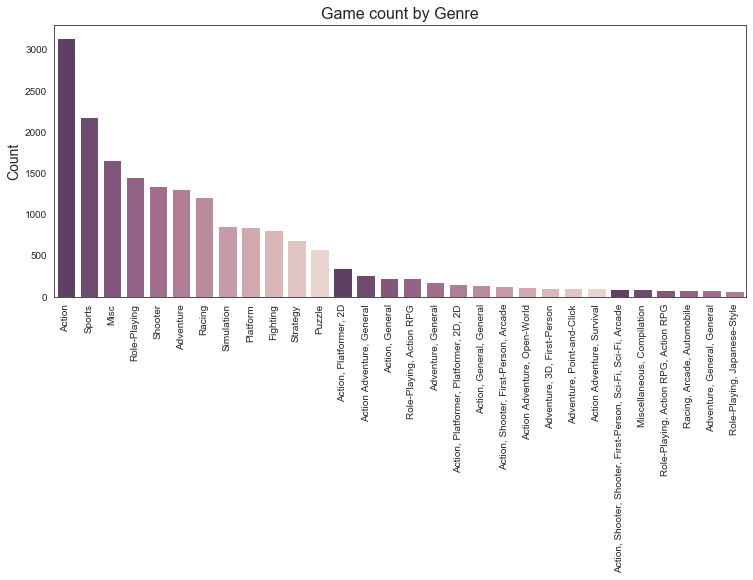

In [4]:
cols = ['Plataforma', 'Developer', 'Publisher', 'Genre']

#Mostrar a contagem de jogos
for col in cols:
    chart = df[['Nome', col]].groupby([col]).count().sort_values('Nome', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Nome', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [5]:
#Criando a coluna de decada
df_ = df
df_ = df_.copy()

#Simplificar a coluna de genero para facilitar as análises e vizualizações e remover multiplos generos
df_['Genre'] = df_['Genre'].apply(lambda x: 
                                  'Beat-''Em-Up''' if('Beat-''Em-Up''' in x)
                                  else 'Sports' if('Sports' in x)
                                  else 'Racing' if('Racing' in x or 'Driving' in x)
                                  else 'Fighting' if('Fighting' in x)
                                  else 'MMO' if('MMO' in x or 'Massive' in x)
                                  else 'Puzzle' if('Puzzle' in x)
                                  else 'Simulation' if('Simulation' in x)
                                  else 'Shooter' if('Shooter' in x)
                                  else 'Strategy' if('Strategy' in x)
                                  else 'RPG' if('RPG' in x or 'Role' in x)
                                  else 'Plataform' if('Platformer' in x or 'Plataform' in x)
                                  else 'Action-Adventure' if('Action' in x and 'Adventure' in x)
                                  else 'Action' if('Action' in x and 'Adventure' not in x)
                                  else 'Adventure' if('Adventure' in x and 'Action' not in x)
                                  else 'Misc')

In [6]:
#Criar a coluna de Grupo de notas para facilitar a análise exploratória
df_['ScoreGroup'] = df_['NotaCritico'].apply(lambda score:
                                            '90-100' if score >= 90
                                            else '80-89' if score >= 80
                                            else '70-79' if score >= 70 
                                            else '60-69' if score >= 60
                                            else '50-59' if score >= 50
                                            else '0-49')

In [7]:
#Criando a coluna de nota geral
df_['NotaGeral'] = (df_['NotaCritico'] + (df_['NotaPublico'] * 10)) / 2
df['NotaGeral'] = (df['NotaCritico'] + (df['NotaPublico'] * 10)) / 2

In [8]:
dfh = df_
#Remover os desenvolvedores ou publicadores que forem desconhecidos
#dfh.query('Developer != "Unknown"', inplace=True)
#dfh.query('Publisher != "Unknown"', inplace=True)

In [9]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass

cols = ['Genre', 'Plataforma', 'Developer', 'Publisher']
for col in cols:
    pack = []
    top = dfh[['Nome', col]].groupby([col]).count().sort_values('Nome', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col, 'ScoreGroup', 'Global_Sales']].groupby([col, 'ScoreGroup']).median(skipna=None).reset_index().pivot(col, "ScoreGroup", "Global_Sales")
    plt.figure(figsize=(9,9))
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []

TypeError: _cython_agg_general() got an unexpected keyword argument 'skipna'

In [10]:
#Criar um indice numérico para as colunas com texto
cols = ['Plataforma', 'Genre', 'Developer', 'Rate', 'Publisher']
for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

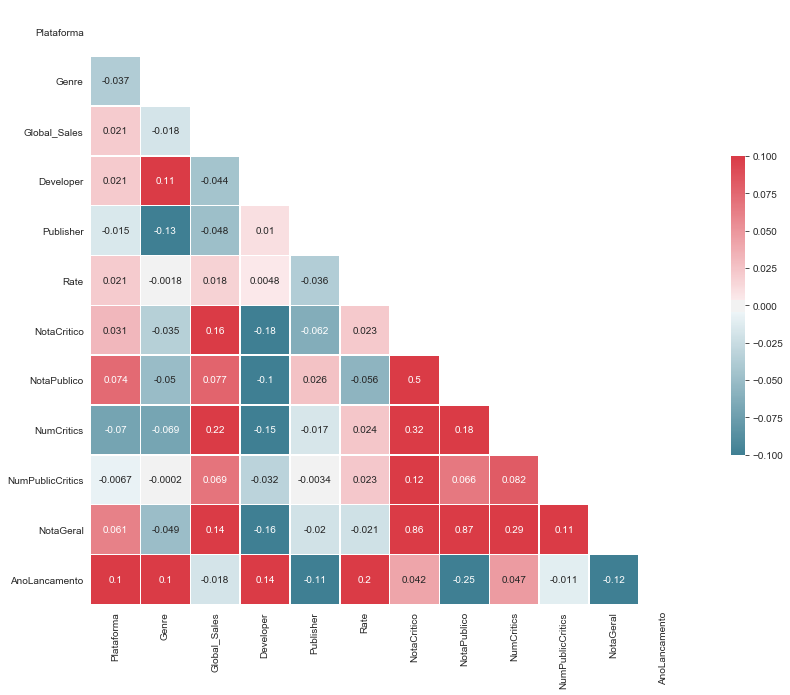

In [11]:
#Utilizar um dataframe separado
df1 = df[['Plataforma', 'Genre', 'Global_Sales', 'Developer', 'Publisher', 'Rate', 'NotaCritico', 'NotaPublico',
          'NumCritics','NumPublicCritics','NotaGeral','AnoLancamento']]
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

# Criar a matriz de correlação pra identificar possíveis fatores
def PlotCorrelationMatrix(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 11))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1, center=0, vmin=-0.1, annot=True,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
PlotCorrelationMatrix(df1)

Uma coisa interessante, um pouco diferente do exemplo que eu me utilizei como base, aqui o numero de criticos tem uma correlação maior ainda com o número de vendas globais

<h3>1.2 Nota dos Criticos/Vendas Globais & Número de notas de Criticos/Vendas Globais</h3>

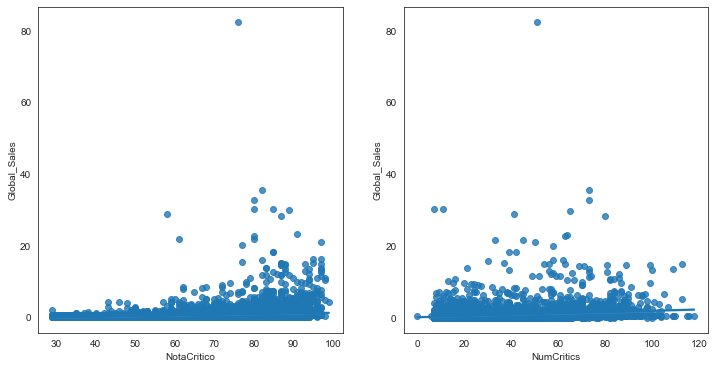

In [12]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.regplot(x="NotaCritico", y="Global_Sales", data=df1, ax=axs[0])
sns.regplot(x="NumCritics", y="Global_Sales", data=df1, ax=axs[1])

[(0, 4), (50, 95)]

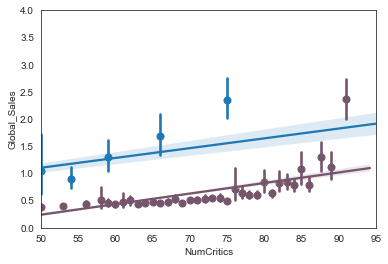

In [13]:
sns.regplot(x="NotaCritico", y="Global_Sales", data=df1,
            truncate=False, x_bins=50, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

sns.regplot(x="NumCritics", y="Global_Sales", data=df1,
            truncate=False, x_bins=50).set(ylim=(0, 4), xlim=(50, 95))

In [14]:
dfa = df_
dfa = df_.copy()
dfb = dfa[['Nome','Plataforma','Genre','Publisher','AnoLancamento','NotaCritico','NotaPublico','NumCritics','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['Plataforma','Genre','Publisher','AnoLancamento','NotaCritico','NotaPublico','NumCritics','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [15]:
#Definir o que é um hit
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

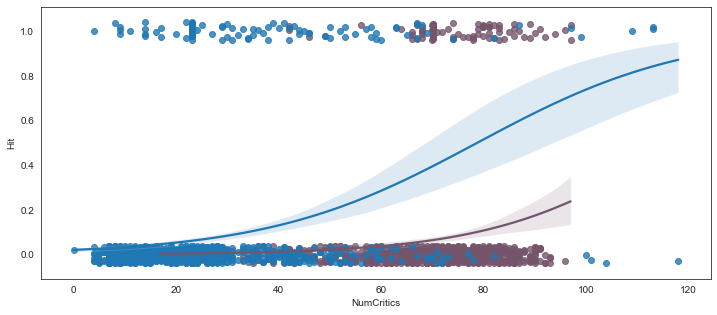

In [16]:
# Logistic regression plot with sample of the data
from math import ceil
n = ceil(0.05 * len(df2['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="NotaCritico", y="Hit", data=df2.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="#75556c")

sns.regplot(x="NumCritics", y="Hit", data=df2.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04)

<h2>2. Modelo de predição/Machine Learning</h2>

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

def test_classifier(clf, df,params):
    X = df[params].values
    y = df['Hit']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = clf.fit(X_train, y_train)
    print('Accuracy: ', accuracy_score(clf.predict(X_test), y_test))
    print('Precision: ', precision_score(clf.predict(X_test), y_test, average="macro"))
    print('Recall: ', recall_score(clf.predict(X_test), y_test, average="macro"))
    print('F1: ', f1_score(clf.predict(X_test), y_test, average="macro"))
    print(confusion_matrix(y_test, clf.predict(X_test)))

In [18]:
df2[:5]

,Plataforma,Genre,Publisher,AnoLancamento,NotaCritico,NotaPublico,NumCritics,Hit
0,Nintendo 64,Action,Nintendo,1998.0,99.0,9.1,22.0,1
1,Playstation,Sports,Activision,2000.0,98.0,7.5,19.0,1
2,Playstation 3,Action,Take-Two Interactive,2008.0,98.0,7.5,64.0,1
3,Dreamcast,Fighting,Namco Bandai Games,1999.0,98.0,8.6,24.0,0
4,Xbox 360,Action,Take-Two Interactive,2008.0,98.0,7.9,86.0,1


In [19]:
from pandas import get_dummies
df_copy = pd.get_dummies(df2)

In [20]:
df_copy[:5]

,AnoLancamento,NotaCritico,NotaPublico,NumCritics,Hit,Plataforma_2600,Plataforma_3DO,Plataforma_3DS,Plataforma_DC,Plataforma_DS,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1998.0,99.0,9.1,22.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000.0,98.0,7.5,19.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,98.0,7.5,64.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1999.0,98.0,8.6,24.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008.0,98.0,7.9,86.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

<h3>2.1 Random Forest</h3>

In [23]:
radm = RandomForestClassifier(random_state=42).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))
test_classifier(radm, df_copy, df3.columns)

Validation accuracy:  0.9314079422382672
Accuracy:  0.9314079422382672
Precision:  0.6333843611062394
Recall:  0.8164422142162749
F1:  0.6800663173563208
[[7301   80]
 [ 471  181]]


<h3>2.2 Regressão Logistica</h3>

In [24]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))
test_classifier(log_reg, df_copy, df3.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Validation accuracy:  0.9284202664010954
Accuracy:  0.9284202664010954
Precision:  0.5877133961098925
Recall:  0.8371601145718015
F1:  0.626653103568962
[[7340   41]
 [ 534  118]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7381
           1       0.74      0.18      0.29       652

    accuracy                           0.93      8033
   macro avg       0.84      0.59      0.63      8033
weighted avg       0.92      0.93      0.91      8033



<h3>2.3 Naive Bayes</h3>

In [26]:
nb = GaussianNB(priors=None, var_smoothing=1e-09)
nb.fit(Xtrain, ytrain)
y_val_3 = nb.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_3).idxmax(axis=1).values
                                   == ytest)/len(ytest))

test_classifier(nb, df_copy, df3.columns)

Validation accuracy:  0.23888958048051787
Accuracy:  0.23888958048051787
Precision:  0.5739432741835072
Recall:  0.5406293686971446
F1:  0.23388894046860503
[[1284 6097]
 [  17  635]]


In [27]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df3.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. feature 0 AnoLancamento (0.151460)
2. feature 3 NumCritics (0.144640)
3. feature 1 NotaCritico (0.134460)
4. feature 2 NotaPublico (0.109833)
5. feature 411 Publisher_Nintendo (0.032857)
6. feature 581 Publisher_Unknown (0.024399)
7. feature 191 Publisher_Electronic Arts (0.018237)
8. feature 38 Genre_Action (0.016313)
9. feature 15 Plataforma_Nintendo (0.014212)
10. feature 43 Genre_Misc (0.013265)


In [28]:
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [29]:
df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [30]:
pred = log_reg.predict_proba(X)

In [31]:
dfb = dfa[['Nome','Plataforma','Genre','Publisher','AnoLancamento','NotaCritico','NotaPublico','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)


dfb = dfb[dfb['Global_Sales'] < 1]

In [32]:
dfb['Hit_Probability'] = pred[:,1]

In [33]:
dfb = dfb[dfb['AnoLancamento'] == 2019]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb = dfb[['Nome', 'Plataforma', 'Hit_Probability']]

In [34]:
dfb[:10].reset_index(drop=True)

,Nome,Plataforma,Hit_Probability
0,Resident Evil 2,Playstation 4,0.503157
1,Resident Evil 2,Xbox One,0.248515
2,Samurai Shodown,Playstation 4,0.189213
3,Final Fantasy VII,Switch,0.180004
4,Final Fantasy X / X-2 HD Remaster,Switch,0.169456
5,Resident Evil 2,PC,0.125379
6,Final Fantasy IX,Switch,0.106394
7,Final Fantasy X / X-2 HD Remaster,Xbox One,0.099379
8,Resident Evil,Switch,0.097768
9,Darksiders: Warmastered Edition,Switch,0.095806


In [35]:
dfb[:-11:-1].reset_index(drop=True)

,Nome,Plataforma,Hit_Probability
0,Dollhouse,Playstation 4,0.000129
1,Headspun,PC,0.000166
2,Submersed,Playstation 4,0.000194
3,Dance of Death: Du Lac & Fey,PC,0.000213
4,Left Alive,Playstation 4,0.000225
5,BANNERMEN,PC,0.000230
6,Eternity: The Last Unicorn,Playstation 4,0.000235
7,Vicious Circle,PC,0.000282
8,Generation Zero,Playstation 4,0.000285
9,Silver Chains,PC,0.000288


In [36]:
df4.head()

,AnoLancamento,NotaCritico,NotaPublico,NumCritics,Plataforma_2600,Plataforma_3DO,Plataforma_3DS,Plataforma_DC,Plataforma_DS,Plataforma_Dreamcast,...,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
3,1999.0,98.0,8.6,24.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2018.0,97.0,7.6,33.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2000.0,97.0,6.1,18.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,2001.0,97.0,7.5,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2018.0,97.0,8.1,98.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
